## Sentiment Analysis across Subreddits
Gulliver Wutz

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
reddit_posts = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/reddit_posts_sentiment_2.csv')
reddit_posts.columns

Index(['Subreddit', 'Title', 'ID', 'Full ID', 'Author', 'URL', 'Is Self-post',
       'Score', 'Comment Count', 'Created CEST', 'Collected CEST',
       'Updated CEST', 'Content', 'Patch', 'BERT-BASE Title Sentiment',
       'BERT-BASE Content Sentiment', 'RoBERTa Title Sentiment',
       'RoBERTa Content Sentiment'],
      dtype='object')

In [44]:
reddit_comments = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/reddit_comments_sentiment_2.csv')
reddit_comments.columns

Index(['Parent ID', 'Comment ID', 'Author', 'Score', 'Created CEST',
       'Collected CEST', 'Content', 'BERT-BASE Comment Sentiment',
       'RoBERTa Comment Sentiment'],
      dtype='object')

### Post Titles - Average Sentiment Scores per Subreddit

In [45]:
titles_avg = reddit_posts.groupby('Subreddit').agg({'Score': 'mean',
                                                     'BERT-BASE Title Sentiment': 'mean',
                                                     'RoBERTa Title Sentiment': 'mean',
                                                     'ID': 'size'}).reset_index()
titles_avg = titles_avg.rename(columns={'ID': 'Number of Posts'})
titles_avg

,Subreddit,Score,BERT-BASE Title Sentiment,RoBERTa Title Sentiment,Number of Posts
0,AatroxMains,38.929009,2.330477,1.004896,817
1,AhriMains,104.588333,2.971667,1.120000,600
2,AkshanMains,15.946188,2.381166,1.121076,223
3,AniviaMains,12.929936,1.917197,0.993631,157
4,AnnieMains,23.482353,2.282353,1.011765,85
...,...,...,...,...,...
161,yorickmains,19.638408,2.119377,1.031142,578
162,yuumimains,56.462428,2.505780,1.089595,346
163,zedmains,37.599338,2.158940,0.993377,302
164,zoemains,29.495356,2.306502,1.108359,323


##### Top and Bottom by 'Score'

In [46]:
titles_avg.sort_values(by='Score', ascending=False, inplace=True)
titles_avg.reset_index(drop=True, inplace=True)
first_5 = titles_avg.iloc[:5]
last_5 = titles_avg.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)
plot_df

,Subreddit,Score,BERT-BASE Title Sentiment,RoBERTa Title Sentiment,Number of Posts
0,leagueoflegends,141.470618,1.876900,0.848531,1974
1,AhriMains,104.588333,2.971667,1.120000,600
2,ornnmains,92.750877,2.189474,1.014035,285
3,GwenMains,92.152961,2.467105,1.090461,608
4,Kindred,81.957447,2.338652,1.097518,564
5,fizzmains,6.925532,2.329787,1.005319,188
6,MaokaiMains,6.892857,2.303571,1.044643,112
7,XinZhaoMains,6.831579,2.263158,1.084211,95
8,LeagueofLegendsMeta,1.812500,2.687500,0.937500,32
9,MarksmanMains,0.821429,3.535714,1.214286,28


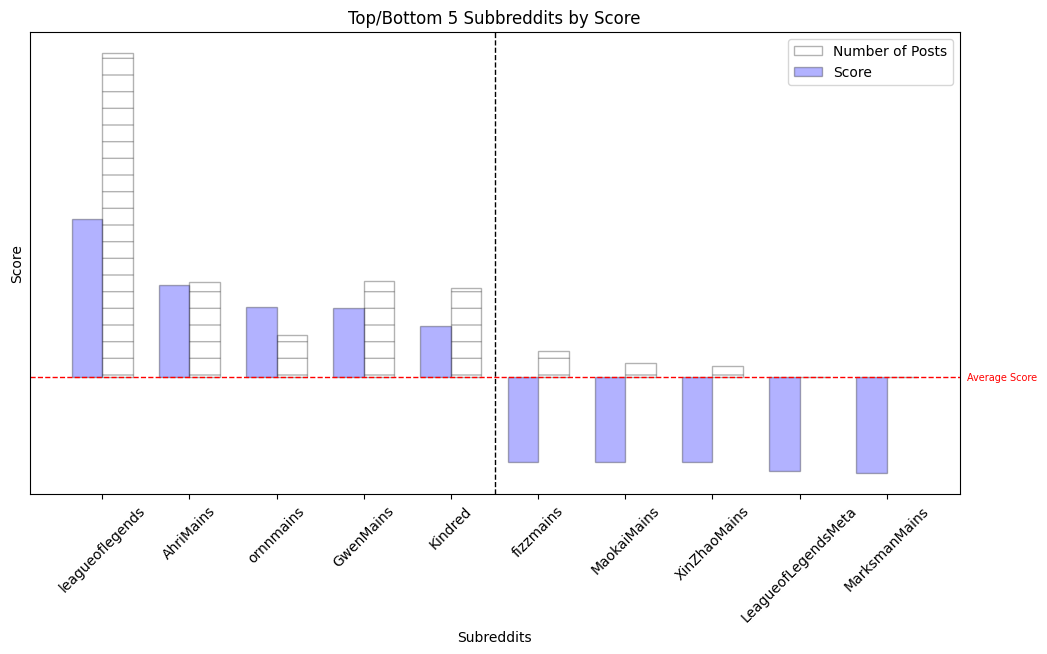

In [47]:
columns_to_normalize = ['Score', 'BERT-BASE Title Sentiment', 'RoBERTa Title Sentiment', 'Number of Posts']
columns_to_offset = ['Number of Posts']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())

# Plotting
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r2, plot_df['Number of Posts'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Number of Posts')
plt.bar(r1, plot_df['Score'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='Score')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.325 
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.1, -0.05, 'Average Score', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + bar_width / 2 for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Score')
plt.title('Top/Bottom 5 Subbreddits by Score')

# Create legend & Show graphic
plt.legend()
plt.show()

##### Top and Bottom by 'BERT-BASE Title Sentiment'

In [48]:
titles_avg.sort_values(by='BERT-BASE Title Sentiment', ascending=False, inplace=True)
titles_avg.reset_index(drop=True, inplace=True)
first_5 = titles_avg.iloc[:5]
last_5 = titles_avg.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)
plot_df

,Subreddit,Score,BERT-BASE Title Sentiment,RoBERTa Title Sentiment,Number of Posts
0,MarksmanMains,0.821429,3.535714,1.214286,28
1,AhriMains,104.588333,2.971667,1.120000,600
2,MorganaMains,73.643443,2.844262,1.122951,244
3,BraumMains,18.989011,2.780220,1.197802,91
4,RakanMains,30.628571,2.771429,1.238095,210
5,MalzaharMains,15.393064,1.872832,0.971098,173
6,reksaimains,13.374179,1.857768,0.879650,457
7,malphitemains,7.008130,1.691057,0.967480,123
8,nunumains,12.237037,1.674074,1.059259,135
9,LeaguePBE,8.958716,0.779817,0.733945,218


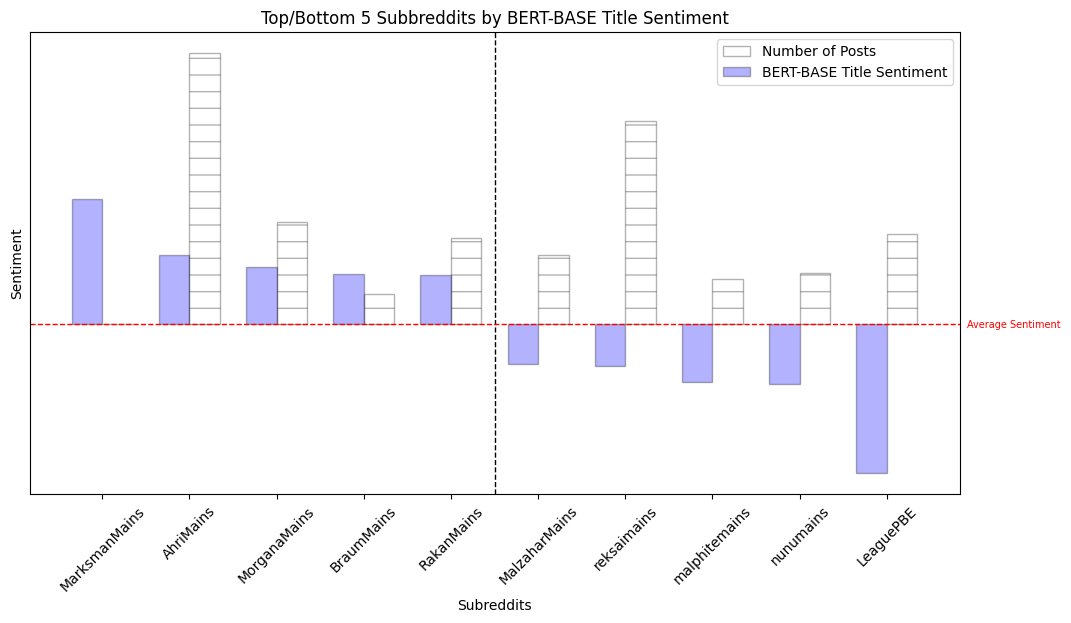

In [49]:
columns_to_normalize = ['Score', 'BERT-BASE Title Sentiment', 'RoBERTa Title Sentiment', 'Number of Posts']
columns_to_offset = ['Number of Posts']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())

# Plotting
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r2, plot_df['Number of Posts'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Number of Posts')
plt.bar(r1, plot_df['BERT-BASE Title Sentiment'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='BERT-BASE Title Sentiment')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.325  # Adjust for zero-indexing
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.1, -0.075, 'Average Sentiment', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + bar_width / 2 for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Sentiment')
plt.title('Top/Bottom 5 Subbreddits by BERT-BASE Title Sentiment')

# Create legend & Show graphic
plt.legend()
plt.show()

##### Top and Bottom by 'RoBERTa Title Sentiment'

In [50]:
titles_avg.sort_values(by='RoBERTa Title Sentiment', ascending=False, inplace=True)
titles_avg.reset_index(drop=True, inplace=True)
first_5 = titles_avg.iloc[:5]
last_5 = titles_avg.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)
plot_df

,Subreddit,Score,BERT-BASE Title Sentiment,RoBERTa Title Sentiment,Number of Posts
0,RakanMains,30.628571,2.771429,1.238095,210
1,MarksmanMains,0.821429,3.535714,1.214286,28
2,BraumMains,18.989011,2.780220,1.197802,91
3,MilioMains,58.229412,2.376471,1.188235,170
4,NautilusMains,12.402778,2.500000,1.180556,72
5,Draven,63.572340,1.961702,0.904255,470
6,reksaimains,13.374179,1.857768,0.879650,457
7,summonerschool,26.129332,2.168216,0.863060,1183
8,leagueoflegends,141.470618,1.876900,0.848531,1974
9,LeaguePBE,8.958716,0.779817,0.733945,218


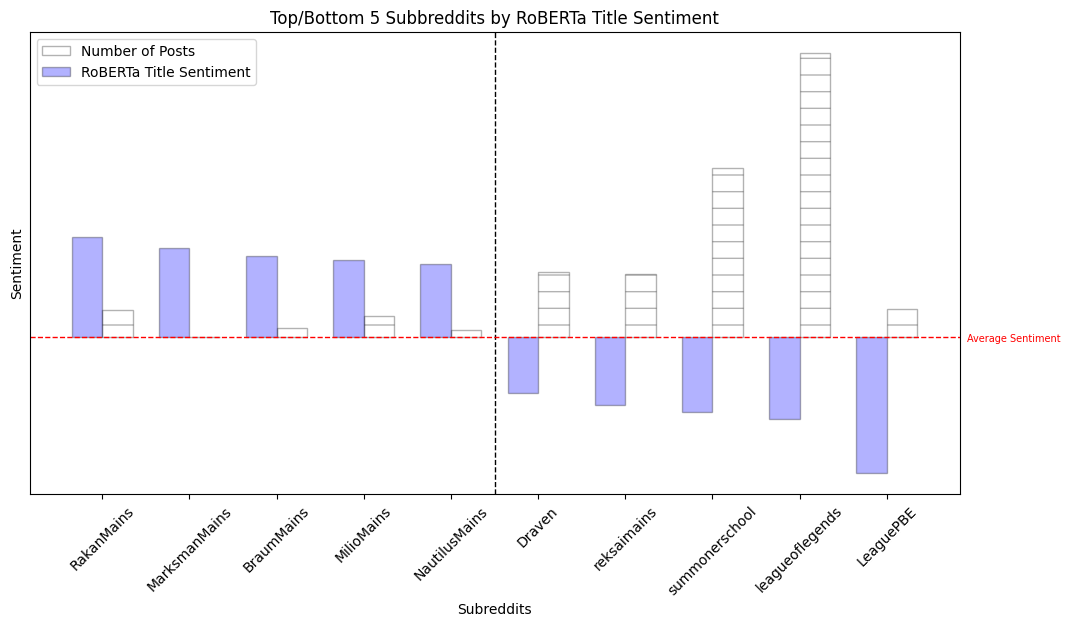

In [51]:
columns_to_normalize = ['Score', 'BERT-BASE Title Sentiment', 'RoBERTa Title Sentiment', 'Number of Posts']
columns_to_offset = ['Number of Posts']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())

# Plotting
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r2, plot_df['Number of Posts'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Number of Posts')
plt.bar(r1, plot_df['RoBERTa Title Sentiment'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='RoBERTa Title Sentiment')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.325  # Adjust for zero-indexing
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.1, -0.075, 'Average Sentiment', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + bar_width / 2 for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Sentiment')
plt.title('Top/Bottom 5 Subbreddits by RoBERTa Title Sentiment')

# Create legend & Show graphic
plt.legend()
plt.show()

### Post Content - Average Sentiment Scores per Subreddit

In [52]:
content_avg = reddit_posts
content_avg = content_avg.drop(content_avg[(content_avg['BERT-BASE Content Sentiment'] == -1) | (content_avg['RoBERTa Content Sentiment'] == -1)].index)
content_avg = content_avg.groupby('Subreddit').agg({'Score': 'mean',
                                                     'BERT-BASE Content Sentiment': 'mean',
                                                     'RoBERTa Content Sentiment': 'mean',
                                                     'ID': 'size'}).reset_index()
content_avg = content_avg.rename(columns={'ID': 'Number of Self-Posts'})
content_avg

,Subreddit,Score,BERT-BASE Content Sentiment,RoBERTa Content Sentiment,Number of Self-Posts
0,AatroxMains,13.928382,1.671088,0.862069,377
1,AhriMains,13.316092,1.919540,0.867816,174
2,AkshanMains,7.704000,1.784000,0.960000,125
3,AniviaMains,6.207921,1.920792,0.960396,101
4,AnnieMains,7.183673,1.734694,0.755102,49
...,...,...,...,...,...
161,yorickmains,7.990260,1.772727,0.873377,308
162,yuumimains,16.428571,2.018634,0.913043,161
163,zedmains,10.929293,1.792929,0.823232,198
164,zoemains,10.034247,1.705479,0.883562,146


##### Top and Bottom by 'Score'

In [53]:
content_avg.sort_values(by='Score', ascending=False, inplace=True)
content_avg.reset_index(drop=True, inplace=True)
first_5 = content_avg.iloc[:5]
last_5 = content_avg.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)
plot_df

,Subreddit,Score,BERT-BASE Content Sentiment,RoBERTa Content Sentiment,Number of Self-Posts
0,leagueoflegends,103.946460,1.502082,0.760262,1681
1,Draven,35.058511,1.468085,0.819149,188
2,summonerschool,26.150592,1.733503,0.752115,1182
3,supportlol,23.237674,1.814159,0.844501,791
4,SeraphineMains,23.042216,1.931398,0.920844,379
5,Elisemains,3.134615,1.576923,0.903846,52
6,malphitemains,2.948052,2.012987,0.961039,77
7,BrandMains,2.476744,1.662791,0.906977,86
8,LeagueofLegendsMeta,1.812500,2.062500,1.000000,32
9,MarksmanMains,1.000000,4.000000,1.000000,1


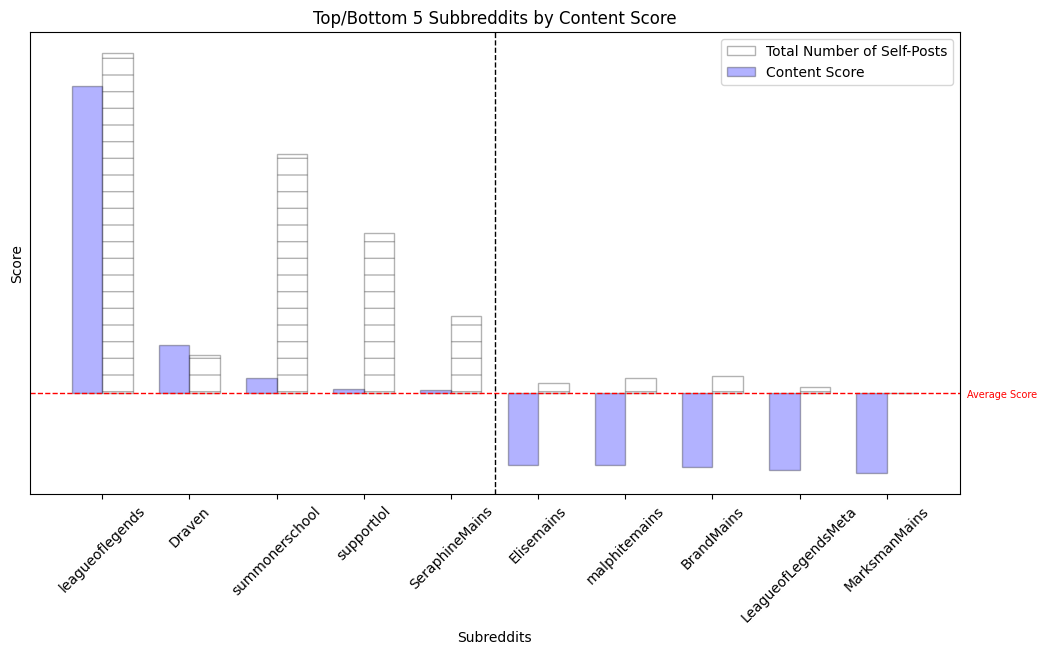

In [54]:
columns_to_normalize = ['Score', 'BERT-BASE Content Sentiment', 'RoBERTa Content Sentiment', 'Number of Self-Posts']
columns_to_offset = ['Number of Self-Posts']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())

# Plotting
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r2, plot_df['Number of Self-Posts'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Total Number of Self-Posts')
plt.bar(r1, plot_df['Score'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='Content Score')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.325  # Adjust for zero-indexing
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.1, -0.06, 'Average Score', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + bar_width / 2 for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Score')
plt.title('Top/Bottom 5 Subbreddits by Content Score')

# Create legend & Show graphic
plt.legend()
plt.show()

##### Top and Bottom by 'BERT-BASE Content Sentiment'

In [55]:
content_avg.sort_values(by='BERT-BASE Content Sentiment', ascending=False, inplace=True)
content_avg.reset_index(drop=True, inplace=True)
first_5 = content_avg.iloc[:5]
last_5 = content_avg.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)
plot_df

,Subreddit,Score,BERT-BASE Content Sentiment,RoBERTa Content Sentiment,Number of Self-Posts
0,MarksmanMains,1.000000,4.000000,1.000000,1
1,taricmains,8.759494,2.367089,1.227848,79
2,TristanaMains,3.959184,2.204082,1.142857,49
3,Rumblemains,6.712500,2.162500,0.987500,80
4,kaisamains,7.809524,2.082251,0.991342,231
5,KassadinMains,6.077419,1.580645,0.787097,155
6,Elisemains,3.134615,1.576923,0.903846,52
7,leagueoflegends,103.946460,1.502082,0.760262,1681
8,Draven,35.058511,1.468085,0.819149,188
9,fizzmains,3.715385,1.446154,0.676923,130


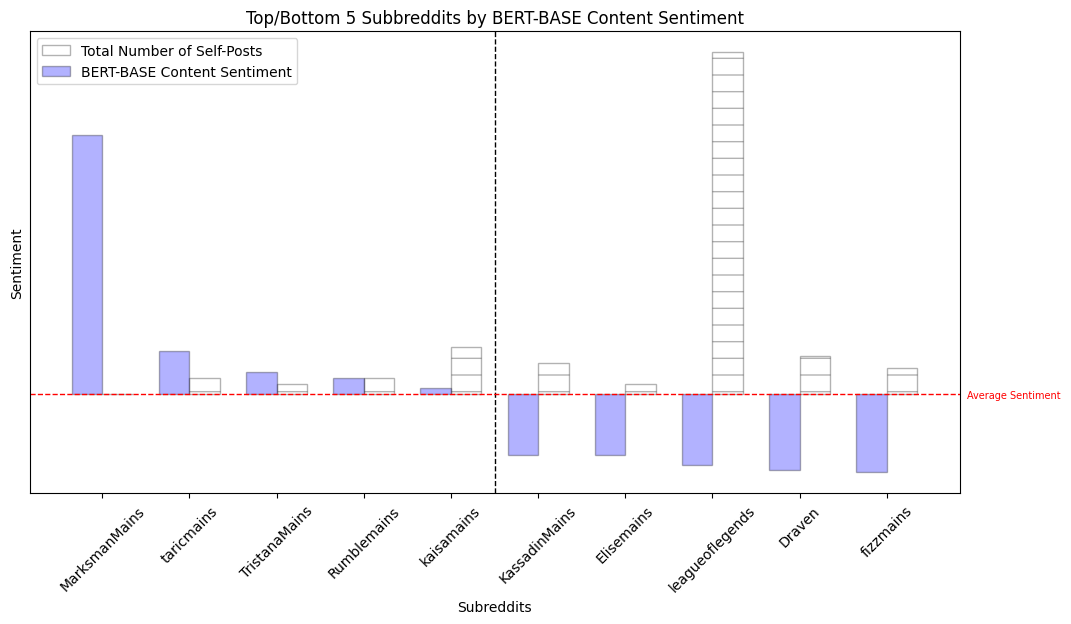

In [56]:
columns_to_normalize = ['Score', 'BERT-BASE Content Sentiment', 'RoBERTa Content Sentiment', 'Number of Self-Posts']
columns_to_offset = ['Number of Self-Posts']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())

# Plotting
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r2, plot_df['Number of Self-Posts'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Total Number of Self-Posts')
plt.bar(r1, plot_df['BERT-BASE Content Sentiment'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='BERT-BASE Content Sentiment')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.325  # Adjust for zero-indexing
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.1, -0.06, 'Average Sentiment', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + bar_width / 2 for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Sentiment')
plt.title('Top/Bottom 5 Subbreddits by BERT-BASE Content Sentiment')

# Create legend & Show graphic
plt.legend()
plt.show()

##### Top and Bottom by 'RoBERTa Content Sentiment'

In [57]:
content_avg.sort_values(by='RoBERTa Content Sentiment', ascending=False, inplace=True)
content_avg.reset_index(drop=True, inplace=True)
first_5 = content_avg.iloc[:5]
last_5 = content_avg.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)
plot_df

,Subreddit,Score,BERT-BASE Content Sentiment,RoBERTa Content Sentiment,Number of Self-Posts
0,taricmains,8.759494,2.367089,1.227848,79
1,alistarmains,4.541667,2.041667,1.187500,48
2,amumumains,4.692308,1.974359,1.179487,39
3,lulumains,12.696429,1.964286,1.178571,56
4,Kennenmains,7.577778,1.911111,1.177778,45
5,AnnieMains,7.183673,1.734694,0.755102,49
6,summonerschool,26.150592,1.733503,0.752115,1182
7,VladimirMains,7.091429,1.634286,0.714286,175
8,FioraMains,6.426136,1.846591,0.710227,176
9,fizzmains,3.715385,1.446154,0.676923,130


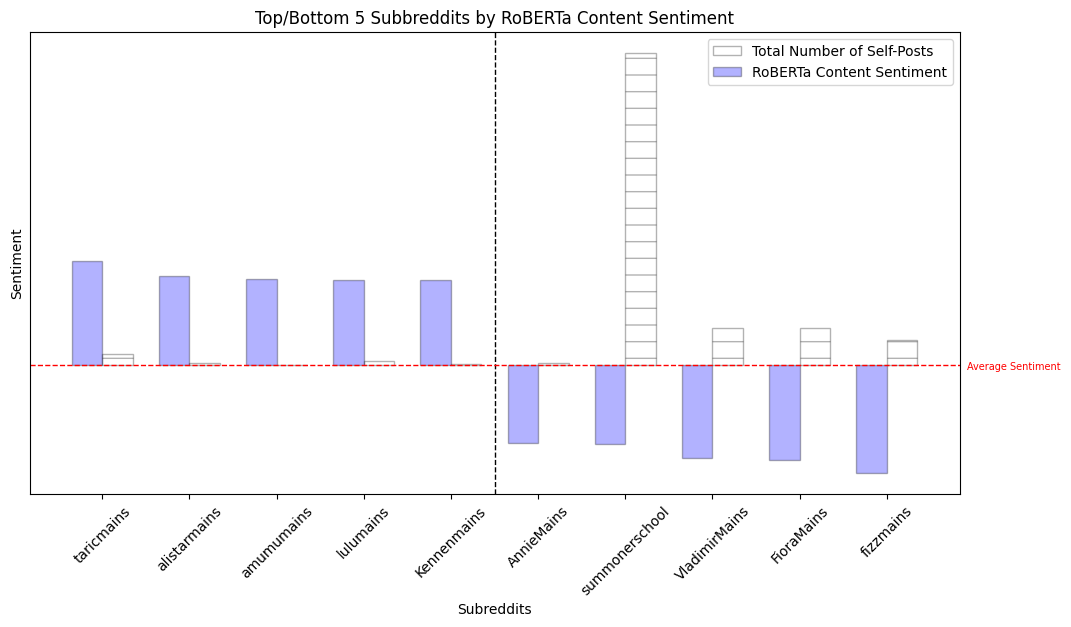

In [58]:
columns_to_normalize = ['Score', 'BERT-BASE Content Sentiment', 'RoBERTa Content Sentiment', 'Number of Self-Posts']
columns_to_offset = ['Number of Self-Posts']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())

# Plotting
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r2, plot_df['Number of Self-Posts'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Total Number of Self-Posts')
plt.bar(r1, plot_df['RoBERTa Content Sentiment'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='RoBERTa Content Sentiment')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.325  # Adjust for zero-indexing
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.1, -0.06, 'Average Sentiment', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + bar_width / 2 for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Sentiment')
plt.title('Top/Bottom 5 Subbreddits by RoBERTa Content Sentiment')

# Create legend & Show graphic
plt.legend()
plt.show()

### Comments Content - Average Sentiment Scores per Patch

In [59]:
comments_avg = reddit_comments.merge(reddit_posts[['ID', 'Subreddit']], left_on='Parent ID', right_on='ID', how='left')
comments_avg.drop('ID', axis=1, inplace=True)
comments_avg = comments_avg.drop(comments_avg[(comments_avg['BERT-BASE Comment Sentiment'] == -1) | (comments_avg['RoBERTa Comment Sentiment'] == -1)].index)
comments_avg = comments_avg.groupby('Subreddit').agg({'Score': 'mean',
                                                     'BERT-BASE Comment Sentiment': 'mean',
                                                     'RoBERTa Comment Sentiment': 'mean',
                                                     'Comment ID': 'size'}).reset_index()
comments_avg = comments_avg.rename(columns={'Comment ID': 'Number of Comments'})
comments_avg

,Subreddit,Score,BERT-BASE Comment Sentiment,RoBERTa Comment Sentiment,Number of Comments
0,AatroxMains,6.555312,1.850164,0.886966,4565
1,AhriMains,3.608970,1.932226,1.176412,3010
2,AkshanMains,3.430046,1.989679,0.973624,872
3,AniviaMains,3.585544,1.984446,0.961574,1093
4,AnnieMains,2.202985,2.059701,0.979104,335
...,...,...,...,...,...
161,yorickmains,5.267356,1.905835,0.937223,2708
162,yuumimains,5.485121,2.033281,0.987862,2554
163,zedmains,5.364263,1.884411,0.891304,1886
164,zoemains,4.042610,1.964048,0.972037,1502


##### Top and Bottom by 'Score'

In [60]:
comments_avg.sort_values(by='Score', ascending=False, inplace=True)
comments_avg.reset_index(drop=True, inplace=True)
first_5 = comments_avg.iloc[:5]
last_5 = comments_avg.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)
plot_df

,Subreddit,Score,BERT-BASE Comment Sentiment,RoBERTa Comment Sentiment,Number of Comments
0,leagueoflegends,25.589949,1.685823,0.777374,32157
1,Draven,13.082437,1.730386,0.857826,2511
2,ornnmains,8.858708,2.000577,1.016148,1734
3,SeraphineMains,7.760629,1.990257,0.990478,4516
4,summonerschool,7.592853,2.011099,0.884949,14776
5,TristanaMains,2.031496,1.874016,0.992126,254
6,fizzmains,2.001098,2.107574,1.035126,911
7,Elisemains,1.980328,1.996721,0.977049,305
8,MarksmanMains,1.500000,0.000000,0.500000,2
9,LeagueofLegendsMeta,1.494118,2.188235,1.105882,85


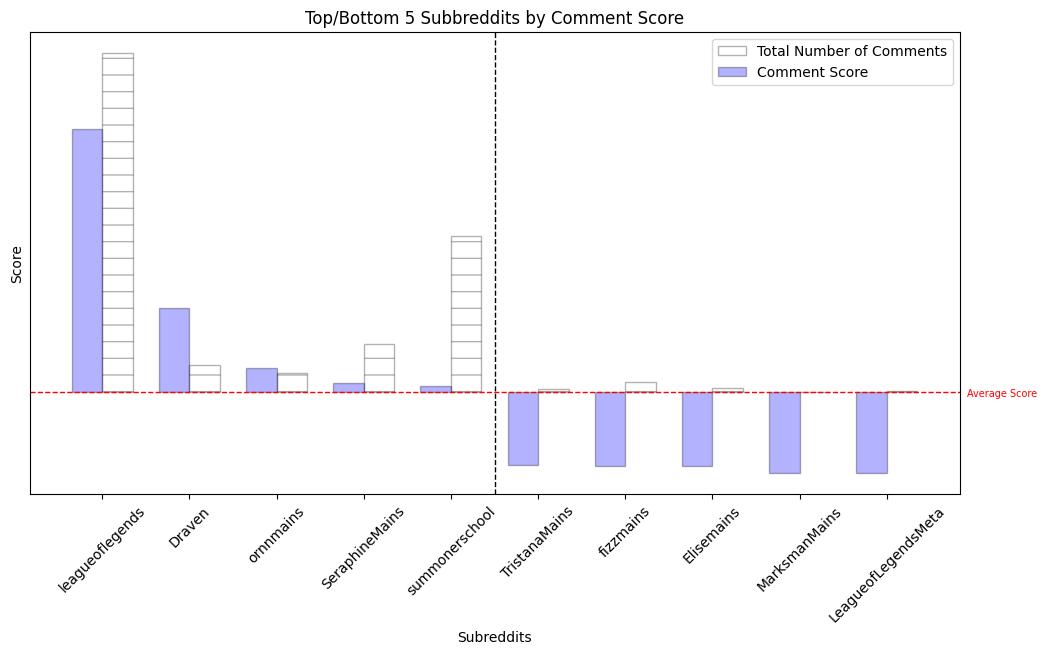

In [61]:
columns_to_normalize = ['Score', 'BERT-BASE Comment Sentiment', 'RoBERTa Comment Sentiment', 'Number of Comments']
columns_to_offset = ['Number of Comments']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())

# Plotting
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r2, plot_df['Number of Comments'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Total Number of Comments')
plt.bar(r1, plot_df['Score'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='Comment Score')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.325
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.1, -0.06, 'Average Score', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + bar_width / 2 for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Score')
plt.title('Top/Bottom 5 Subbreddits by Comment Score')

# Create legend & Show graphic
plt.legend()
plt.show()

##### Top and Bottom by 'BERT-BASE Comment Sentiment'

In [62]:
comments_avg.sort_values(by='BERT-BASE Comment Sentiment', ascending=False, inplace=True)
comments_avg.reset_index(drop=True, inplace=True)
first_5 = comments_avg.iloc[:5]
last_5 = comments_avg.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)
plot_df

,Subreddit,Score,BERT-BASE Comment Sentiment,RoBERTa Comment Sentiment,Number of Comments
0,sejuanimains,2.855140,2.434579,1.056075,214
1,bardmains,6.262047,2.394694,1.125609,1847
2,NamiMains,5.717695,2.339918,1.162140,1215
3,leagueofjinx,3.070787,2.339326,1.222472,890
4,GnarMains,3.376884,2.296482,1.118090,398
5,KassadinMains,3.969697,1.706152,0.832874,1089
6,KSanteMains,4.977957,1.692792,0.788314,2858
7,leagueoflegends,25.589949,1.685823,0.777374,32157
8,LeaguePBE,4.815009,1.502439,0.747092,2665
9,MarksmanMains,1.500000,0.000000,0.500000,2


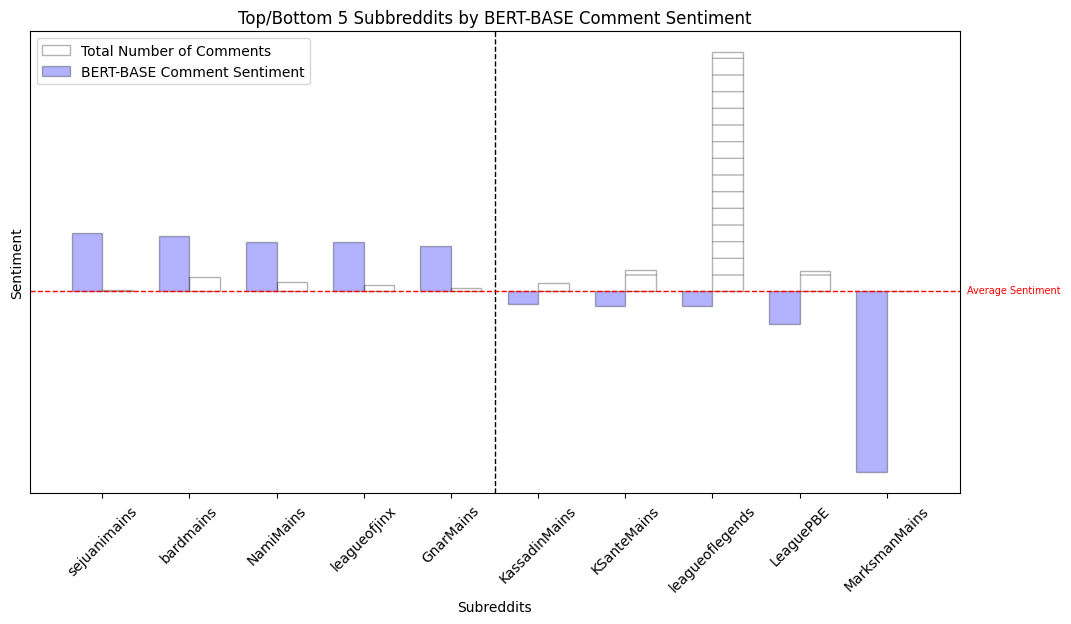

In [63]:
columns_to_normalize = ['Score', 'BERT-BASE Comment Sentiment', 'RoBERTa Comment Sentiment', 'Number of Comments']
columns_to_offset = ['Number of Comments']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())

# Plotting
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r2, plot_df['Number of Comments'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Total Number of Comments')
plt.bar(r1, plot_df['BERT-BASE Comment Sentiment'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='BERT-BASE Comment Sentiment')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.325  # Adjust for zero-indexing
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.1, -0.06, 'Average Sentiment', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + bar_width / 2 for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Sentiment')
plt.title('Top/Bottom 5 Subbreddits by BERT-BASE Comment Sentiment')

# Create legend & Show graphic
plt.legend()
plt.show()

##### Top and Bottom by 'RoBERTa Comment Sentiment'

In [64]:
comments_avg.sort_values(by='RoBERTa Comment Sentiment', ascending=False, inplace=True)
comments_avg.reset_index(drop=True, inplace=True)
first_5 = comments_avg.iloc[:5]
last_5 = comments_avg.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)
plot_df

,Subreddit,Score,BERT-BASE Comment Sentiment,RoBERTa Comment Sentiment,Number of Comments
0,blitzcrankmains,2.743056,2.152778,1.243056,144
1,BraumMains,3.984556,2.173745,1.227799,259
2,leagueofjinx,3.070787,2.339326,1.222472,890
3,neekomains,4.121184,2.093432,1.185014,1081
4,Janna,4.460186,2.280248,1.183040,967
5,CamilleMains,5.272177,1.810474,0.794442,2807
6,KSanteMains,4.977957,1.692792,0.788314,2858
7,leagueoflegends,25.589949,1.685823,0.777374,32157
8,LeaguePBE,4.815009,1.502439,0.747092,2665
9,MarksmanMains,1.500000,0.000000,0.500000,2


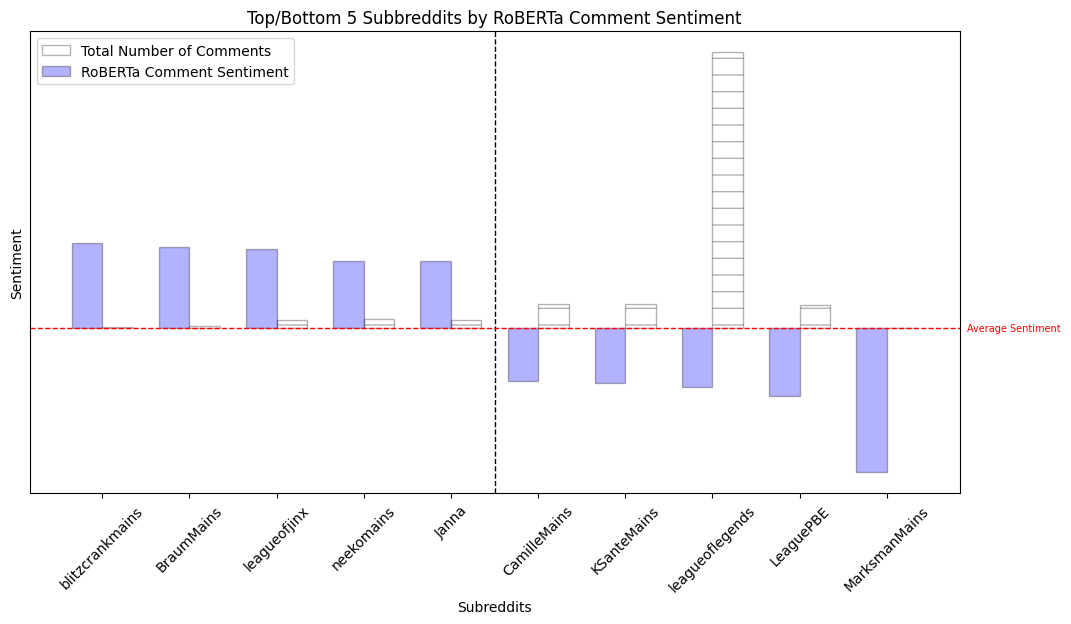

In [65]:
columns_to_normalize = ['Score', 'BERT-BASE Comment Sentiment', 'RoBERTa Comment Sentiment', 'Number of Comments']
columns_to_offset = ['Number of Comments']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())

# Plotting
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r2, plot_df['Number of Comments'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Total Number of Comments')
plt.bar(r1, plot_df['RoBERTa Comment Sentiment'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='RoBERTa Comment Sentiment')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.325  # Adjust for zero-indexing
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.1, -0.06, 'Average Sentiment', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + bar_width / 2 for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Sentiment')
plt.title('Top/Bottom 5 Subbreddits by RoBERTa Comment Sentiment')

# Create legend & Show graphic
plt.legend()
plt.show()

### Post Titles - Aggregate Analysis per Subreddit

##### Top and Bottom by 'Score Rank'

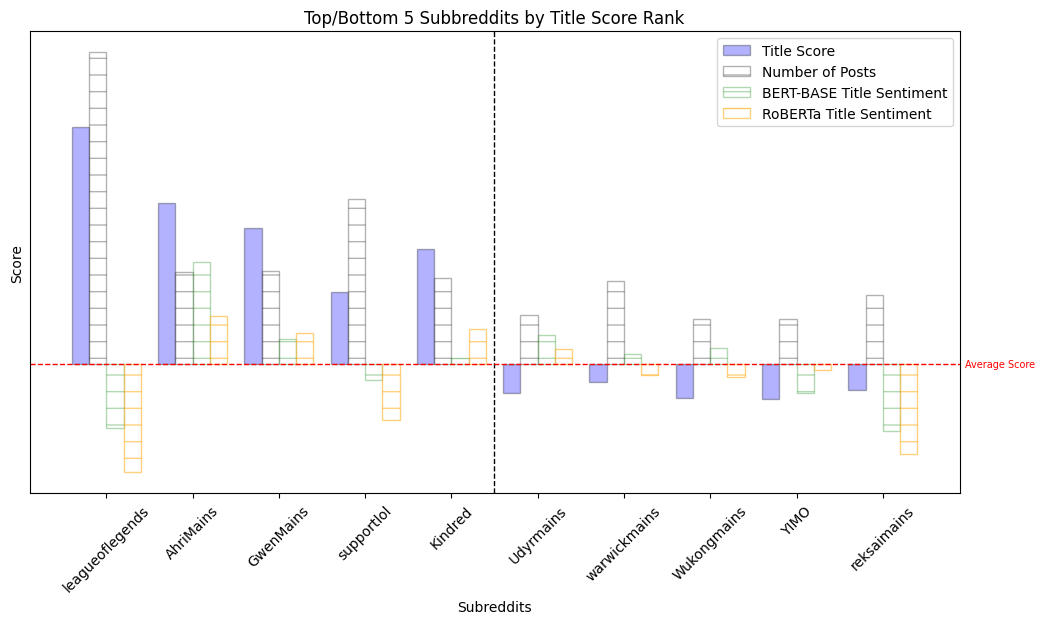

In [67]:
titles_avg = reddit_posts.groupby('Subreddit').agg({'Score': 'mean',
                                                     'BERT-BASE Title Sentiment': 'mean',
                                                     'RoBERTa Title Sentiment': 'mean',
                                                     'ID': 'size'}).reset_index()
plot_df = titles_avg.rename(columns={'ID': 'Number of Posts'})

columns_to_normalize = ['Score', 'BERT-BASE Title Sentiment', 'RoBERTa Title Sentiment', 'Number of Posts']
columns_to_offset = ['Number of Posts']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())
plot_df['Score Rank'] = plot_df['Score'] * plot_df['Number of Posts']

plot_df.sort_values(by='Score Rank', ascending=False, inplace=True)
plot_df.reset_index(drop=True, inplace=True)
first_5 = plot_df.iloc[:5]
last_5 = plot_df.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)

# Plotting
bar_width = 0.2

# Position of bars on x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r1, plot_df['Score'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='Title Score')
plt.bar(r2, plot_df['Number of Posts'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Number of Posts')
plt.bar(r3, plot_df['BERT-BASE Title Sentiment'], color='white', alpha=0.3, width=bar_width, edgecolor='green', hatch='-', label='BERT-BASE Title Sentiment')
plt.bar(r4, plot_df['RoBERTa Title Sentiment'], color='white', alpha=0.5, width=bar_width, edgecolor='orange', hatch='-', label='RoBERTa Title Sentiment')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.21
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.25, -0.125, 'Average Score', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + 1.5 * bar_width for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Score')
plt.title('Top/Bottom 5 Subbreddits by Title Score Rank')

# Create legend & Show graphic
plt.legend()
plt.show()


##### Top and Bottom by 'Sentiment Rank'

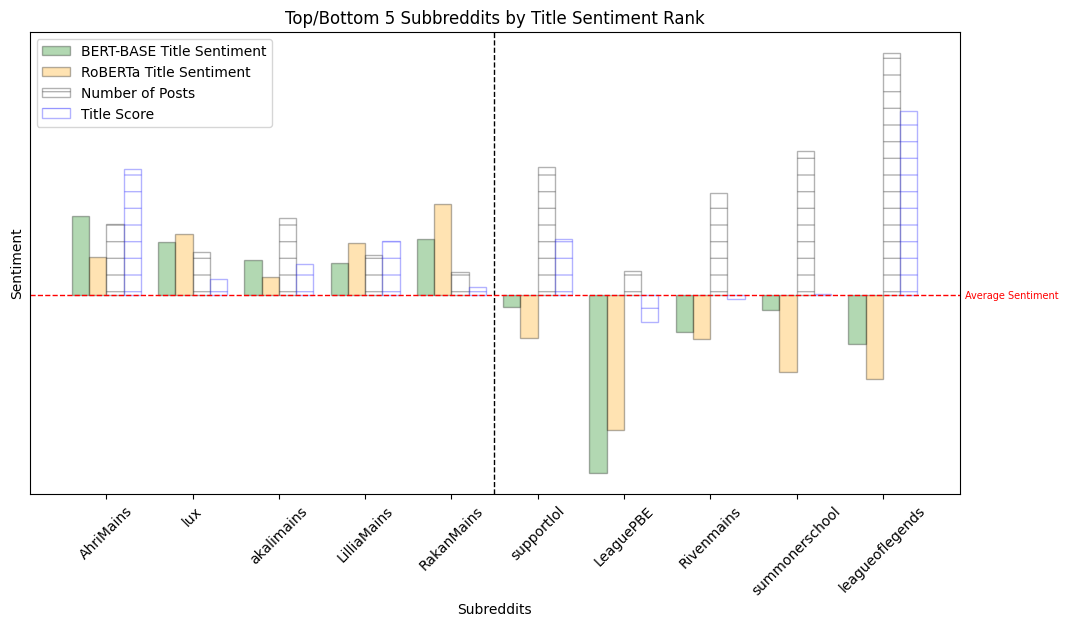

In [68]:
titles_avg = reddit_posts.groupby('Subreddit').agg({'Score': 'mean',
                                                     'BERT-BASE Title Sentiment': 'mean',
                                                     'RoBERTa Title Sentiment': 'mean',
                                                     'ID': 'size'}).reset_index()
plot_df = titles_avg.rename(columns={'ID': 'Number of Posts'})

columns_to_normalize = ['Score', 'BERT-BASE Title Sentiment', 'RoBERTa Title Sentiment', 'Number of Posts']
columns_to_offset = ['Number of Posts']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())
plot_df['Sentiment Rank'] = ((plot_df['BERT-BASE Title Sentiment'] + plot_df['RoBERTa Title Sentiment']) / 2) * plot_df['Number of Posts']

plot_df.sort_values(by='Sentiment Rank', ascending=False, inplace=True)
plot_df.reset_index(drop=True, inplace=True)
first_5 = plot_df.iloc[:5]
last_5 = plot_df.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)

# Plotting
bar_width = 0.2

# Position of bars on x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r1, plot_df['BERT-BASE Title Sentiment'], color='green', alpha=0.3, width=bar_width, edgecolor='black', label='BERT-BASE Title Sentiment')
plt.bar(r2, plot_df['RoBERTa Title Sentiment'], color='orange', alpha=0.3, width=bar_width, edgecolor='black', label='RoBERTa Title Sentiment')
plt.bar(r3, plot_df['Number of Posts'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Number of Posts')
plt.bar(r4, plot_df['Score'], color='white', width=bar_width, alpha=0.3, edgecolor='blue', hatch='-', label='Title Score')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.21
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.25, -0.18, 'Average Sentiment', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + 1.5 * bar_width for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Sentiment')
plt.title('Top/Bottom 5 Subbreddits by Title Sentiment Rank')

# Create legend & Show graphic
plt.legend()
plt.show()

### Post Content - Aggregate Analysis per Subreddit

##### Top and Bottom by 'Score Rank'

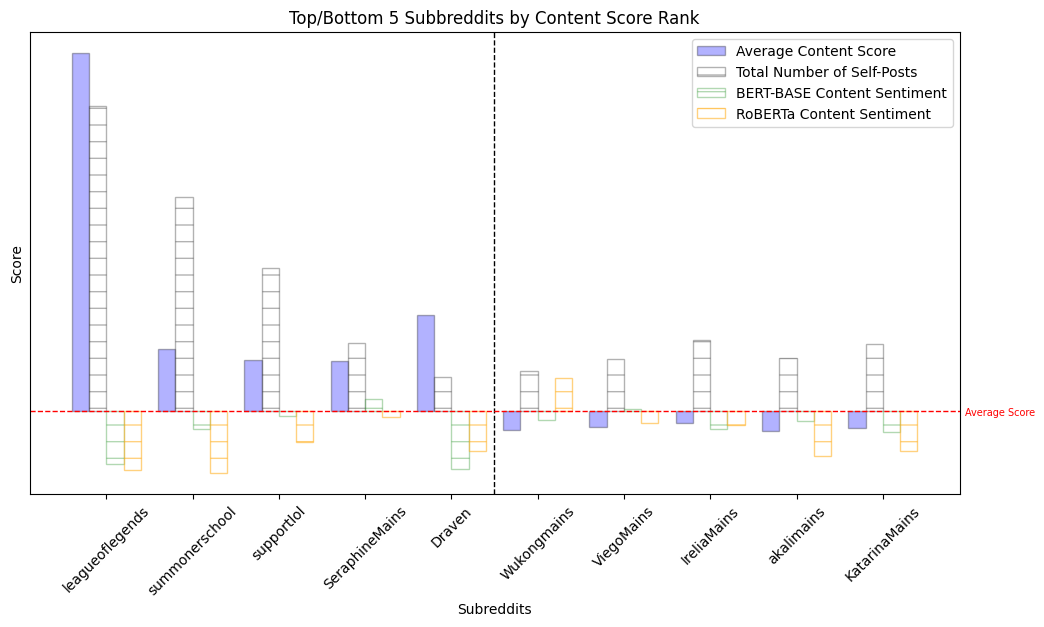

In [69]:
content_avg = reddit_posts
content_avg = content_avg.drop(content_avg[(content_avg['BERT-BASE Content Sentiment'] == -1) | (content_avg['RoBERTa Content Sentiment'] == -1)].index)
content_avg = content_avg.groupby('Subreddit').agg({'Score': 'mean',
                                                     'BERT-BASE Content Sentiment': 'mean',
                                                     'RoBERTa Content Sentiment': 'mean',
                                                     'ID': 'size'}).reset_index()
plot_df = content_avg.rename(columns={'ID': 'Number of Self-Posts'})


columns_to_normalize = ['Score', 'BERT-BASE Content Sentiment', 'RoBERTa Content Sentiment', 'Number of Self-Posts']
columns_to_offset = ['Number of Self-Posts']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())
plot_df['Score Rank'] = plot_df['Score'] * plot_df['Number of Self-Posts']

plot_df.sort_values(by='Score Rank', ascending=False, inplace=True)
plot_df.reset_index(drop=True, inplace=True)
first_5 = plot_df.iloc[:5]
last_5 = plot_df.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)

# Plotting
bar_width = 0.2

# Position of bars on x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r1, plot_df['Score'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='Average Content Score')
plt.bar(r2, plot_df['Number of Self-Posts'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Total Number of Self-Posts')
plt.bar(r3, plot_df['BERT-BASE Content Sentiment'], color='white', alpha=0.3, width=bar_width, edgecolor='green', hatch='-', label='BERT-BASE Content Sentiment')
plt.bar(r4, plot_df['RoBERTa Content Sentiment'], color='white', alpha=0.5, width=bar_width, edgecolor='orange', hatch='-', label='RoBERTa Content Sentiment')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.21
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.25, -0.18, 'Average Score', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + 1.5 * bar_width for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Score')
plt.title('Top/Bottom 5 Subbreddits by Content Score Rank')

# Create legend & Show graphic
plt.legend()
plt.show()

##### Top and Bottom by 'Sentiment Rank'

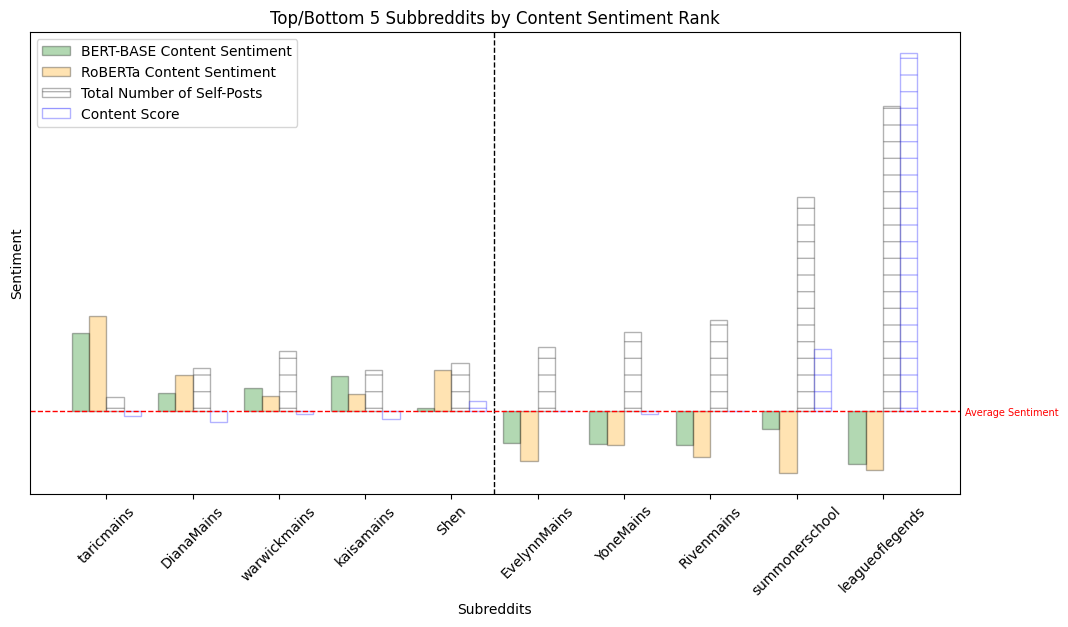

In [70]:
content_avg = reddit_posts
content_avg = content_avg.drop(content_avg[(content_avg['BERT-BASE Content Sentiment'] == -1) | (content_avg['RoBERTa Content Sentiment'] == -1)].index)
content_avg = content_avg.groupby('Subreddit').agg({'Score': 'mean',
                                                     'BERT-BASE Content Sentiment': 'mean',
                                                     'RoBERTa Content Sentiment': 'mean',
                                                     'ID': 'size'}).reset_index()
plot_df = content_avg.rename(columns={'ID': 'Number of Self-Posts'})

columns_to_normalize = ['Score', 'BERT-BASE Content Sentiment', 'RoBERTa Content Sentiment', 'Number of Self-Posts']
columns_to_offset = ['Number of Self-Posts']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())
plot_df['Sentiment Rank'] = ((plot_df['BERT-BASE Content Sentiment'] + plot_df['RoBERTa Content Sentiment']) / 2) * plot_df['Number of Self-Posts']

plot_df.sort_values(by='Sentiment Rank', ascending=False, inplace=True)
plot_df.reset_index(drop=True, inplace=True)
first_5 = plot_df.iloc[:5]
last_5 = plot_df.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)

# Plotting
bar_width = 0.2

# Position of bars on x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r1, plot_df['BERT-BASE Content Sentiment'], color='green', alpha=0.3, width=bar_width, edgecolor='black', label='BERT-BASE Content Sentiment')
plt.bar(r2, plot_df['RoBERTa Content Sentiment'], color='orange', alpha=0.3, width=bar_width, edgecolor='black', label='RoBERTa Content Sentiment')
plt.bar(r3, plot_df['Number of Self-Posts'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Total Number of Self-Posts')
plt.bar(r4, plot_df['Score'], color='white', width=bar_width, alpha=0.3, edgecolor='blue', hatch='-', label='Content Score')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.21
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.25, -0.18, 'Average Sentiment', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + 1.5 * bar_width for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Sentiment')
plt.title('Top/Bottom 5 Subbreddits by Content Sentiment Rank')

# Create legend & Show graphic
plt.legend()
plt.show()

### Post Comments - Aggregate Analysis per Subreddit

##### Top and Bottom by 'Score Rank'

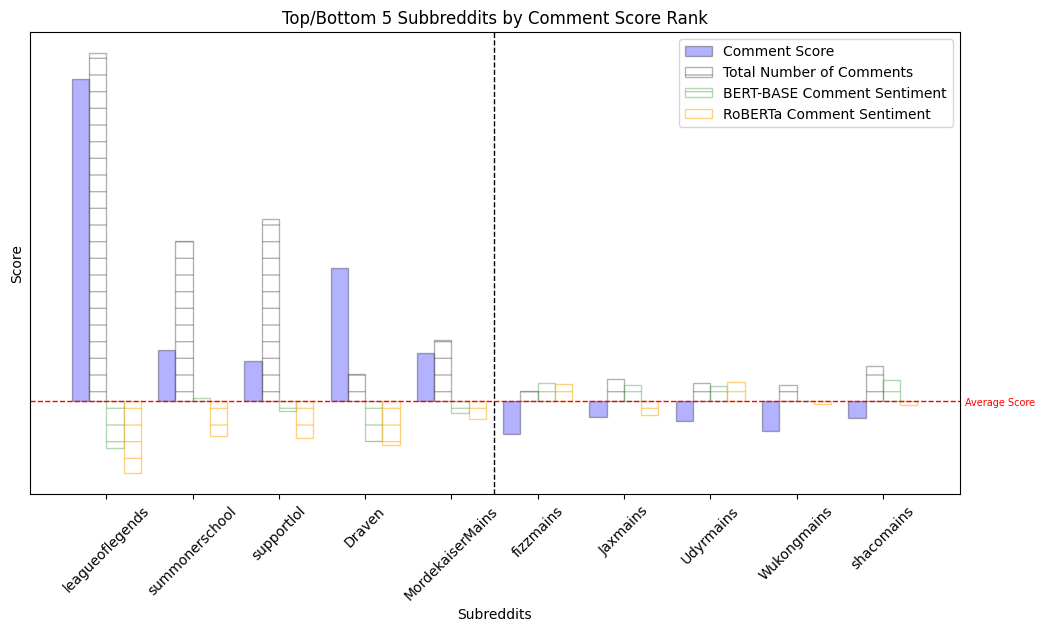

In [71]:
comments_avg = reddit_comments.merge(reddit_posts[['ID', 'Subreddit']], left_on='Parent ID', right_on='ID', how='left')
comments_avg.drop('ID', axis=1, inplace=True)
comments_avg = comments_avg.drop(comments_avg[(comments_avg['BERT-BASE Comment Sentiment'] == -1) | (comments_avg['RoBERTa Comment Sentiment'] == -1)].index)
comments_avg = comments_avg.groupby('Subreddit').agg({'Score': 'mean',
                                                     'BERT-BASE Comment Sentiment': 'mean',
                                                     'RoBERTa Comment Sentiment': 'mean',
                                                     'Comment ID': 'size'}).reset_index()
plot_df = comments_avg.rename(columns={'Comment ID': 'Number of Comments'})

columns_to_normalize = ['Score', 'BERT-BASE Comment Sentiment', 'RoBERTa Comment Sentiment', 'Number of Comments']
columns_to_offset = ['Number of Comments']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())
plot_df['Score Rank'] = plot_df['Score'] * plot_df['Number of Comments']

plot_df.sort_values(by='Score Rank', ascending=False, inplace=True)
plot_df.reset_index(drop=True, inplace=True)
first_5 = plot_df.iloc[:5]
last_5 = plot_df.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)
plot_df

# Plotting
bar_width = 0.2

# Position of bars on x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r1, plot_df['Score'], color='blue', alpha=0.3, width=bar_width, edgecolor='black', label='Comment Score')
plt.bar(r2, plot_df['Number of Comments'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Total Number of Comments')
plt.bar(r3, plot_df['BERT-BASE Comment Sentiment'], color='white', alpha=0.3, width=bar_width, edgecolor='green', hatch='-', label='BERT-BASE Comment Sentiment')
plt.bar(r4, plot_df['RoBERTa Comment Sentiment'], color='white', alpha=0.5, width=bar_width, edgecolor='orange', hatch='-', label='RoBERTa Comment Sentiment')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.21
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.25, -0.18, 'Average Score', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + 1.5 * bar_width for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Score')
plt.title('Top/Bottom 5 Subbreddits by Comment Score Rank')

# Create legend & Show graphic
plt.legend()
plt.show()

##### Top and Bottom by 'Sentiment Rank'

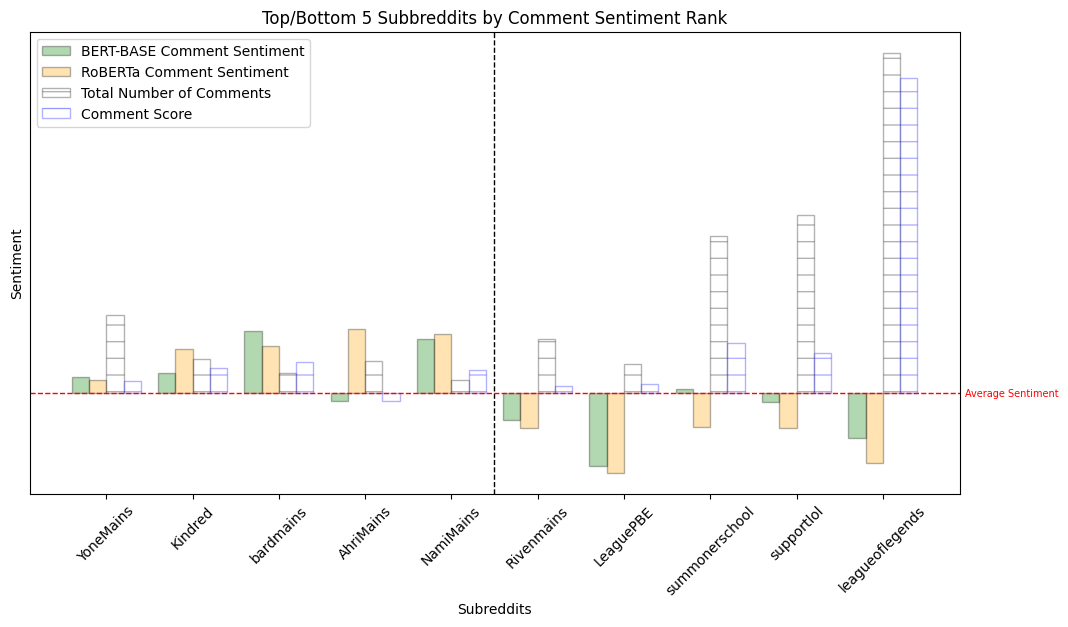

In [72]:
comments_avg = reddit_comments.merge(reddit_posts[['ID', 'Subreddit']], left_on='Parent ID', right_on='ID', how='left')
comments_avg.drop('ID', axis=1, inplace=True)
comments_avg = comments_avg.drop(comments_avg[(comments_avg['BERT-BASE Comment Sentiment'] == -1) | (comments_avg['RoBERTa Comment Sentiment'] == -1)].index)
comments_avg = comments_avg.groupby('Subreddit').agg({'Score': 'mean',
                                                     'BERT-BASE Comment Sentiment': 'mean',
                                                     'RoBERTa Comment Sentiment': 'mean',
                                                     'Comment ID': 'size'}).reset_index()
plot_df = comments_avg.rename(columns={'Comment ID': 'Number of Comments'})

columns_to_normalize = ['Score', 'BERT-BASE Comment Sentiment', 'RoBERTa Comment Sentiment', 'Number of Comments']
columns_to_offset = ['Number of Comments']
plot_df[columns_to_normalize] = plot_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
plot_df[columns_to_offset] = plot_df[columns_to_offset].apply(lambda x: x - x.min())
plot_df['Sentiment Rank'] = ((plot_df['BERT-BASE Comment Sentiment'] + plot_df['RoBERTa Comment Sentiment']) / 2) * plot_df['Number of Comments']

plot_df.sort_values(by='Sentiment Rank', ascending=False, inplace=True)
plot_df.reset_index(drop=True, inplace=True)
first_5 = plot_df.iloc[:5]
last_5 = plot_df.iloc[-5:]
plot_df = pd.concat([first_5, last_5])
plot_df.reset_index(drop=True, inplace=True)

# Plotting
bar_width = 0.2

# Position of bars on x-axis
r1 = np.arange(len(plot_df['Subreddit']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r1, plot_df['BERT-BASE Comment Sentiment'], color='green', alpha=0.3, width=bar_width, edgecolor='black', label='BERT-BASE Comment Sentiment')
plt.bar(r2, plot_df['RoBERTa Comment Sentiment'], color='orange', alpha=0.3, width=bar_width, edgecolor='black', label='RoBERTa Comment Sentiment')
plt.bar(r3, plot_df['Number of Comments'], color='white', alpha=0.3, width=bar_width, edgecolor='black', hatch='-', label='Total Number of Comments')
plt.bar(r4, plot_df['Score'], color='white', width=bar_width, alpha=0.3, edgecolor='blue', hatch='-', label='Comment Score')


# Add a vertical dashed red line in the center of the plot
center_position = len(plot_df['Subreddit']) / 2 - 0.21
plt.axvline(x=center_position, color='black', linestyle='--', linewidth=1)

# Add a dashed horizontal red line at y=0 across the entire plot
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.text(len(plot_df['Subreddit']) + 0.25, -0.18, 'Average Sentiment', color='red', fontsize=7, verticalalignment='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Subreddits')
plt.xticks([r + 1.5 * bar_width for r in range(len(plot_df['Subreddit']))], plot_df['Subreddit'])
plt.xticks(rotation=45)
plt.yticks([])

# Add labels and title
plt.ylabel('Sentiment')
plt.title('Top/Bottom 5 Subbreddits by Comment Sentiment Rank')

# Create legend & Show graphic
plt.legend()
plt.show()

### Post Titles+Content - Score Volatility Analysis per Subreddit

##### Top 5 by 'Score Volatility Rank'

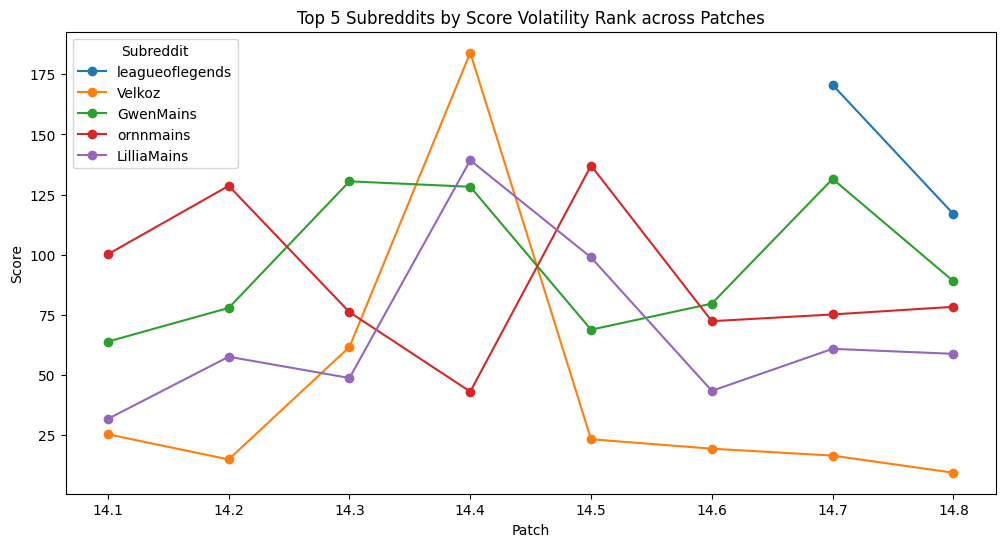

In [73]:
subreddit_patch_values_df = reddit_posts.groupby(['Subreddit', 'Patch']).agg(
    Score=('Score', 'mean'),
    Number_of_Posts=('ID', 'size')
).reset_index()
subreddit_patch_values_df['Avg_Score'] = subreddit_patch_values_df['Score']

subreddit_patch_values_df['diffs'] = subreddit_patch_values_df['Avg_Score'].diff()
mask = subreddit_patch_values_df.Subreddit != subreddit_patch_values_df.Subreddit.shift(1)
subreddit_patch_values_df.loc[mask, 'diffs'] = np.nan
subreddit_patch_values_df['diffs'] = subreddit_patch_values_df['diffs'].fillna(0)
subreddit_patch_values_df['diffs_squared'] = subreddit_patch_values_df['diffs'] ** 2

# Normalize
columns_to_normalize = ['diffs_squared']
subreddit_patch_values_df[columns_to_normalize] = subreddit_patch_values_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

volatility_df = subreddit_patch_values_df.groupby(['Subreddit']).agg(
    diffs_squared=('diffs_squared', 'mean'),
    Number_of_Posts=('Number_of_Posts', 'sum')
).reset_index()
volatility_df['volatility_rank'] = volatility_df['diffs_squared'] * volatility_df['Number_of_Posts']
volatility_df.sort_values(by='volatility_rank', ascending=False, inplace=True)
volatility_df.reset_index(drop=True, inplace=True)
volatility_df = volatility_df.iloc[:5]
volatility_df.reset_index(drop=True, inplace=True)

plot_df = subreddit_patch_values_df[subreddit_patch_values_df['Subreddit'].isin(volatility_df['Subreddit'])]
plot_df = plot_df.merge(volatility_df[['Subreddit', 'volatility_rank']], on='Subreddit', how='left')
plot_df.sort_values(by=['volatility_rank', 'Patch'], ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

for subreddit in plot_df['Subreddit'].unique():
    subset = plot_df[plot_df['Subreddit'] == subreddit]
    plt.plot(subset['Patch'], subset['Avg_Score'], marker='o', label=subreddit)

plt.title('Top 5 Subreddits by Score Volatility Rank across Patches')
plt.xlabel('Patch')
plt.ylabel('Score')
# plt.yticks([])
plt.legend(title='Subreddit')
plt.grid(False)
plt.show()

##### Bottom 5 by 'Score Volatility Rank'

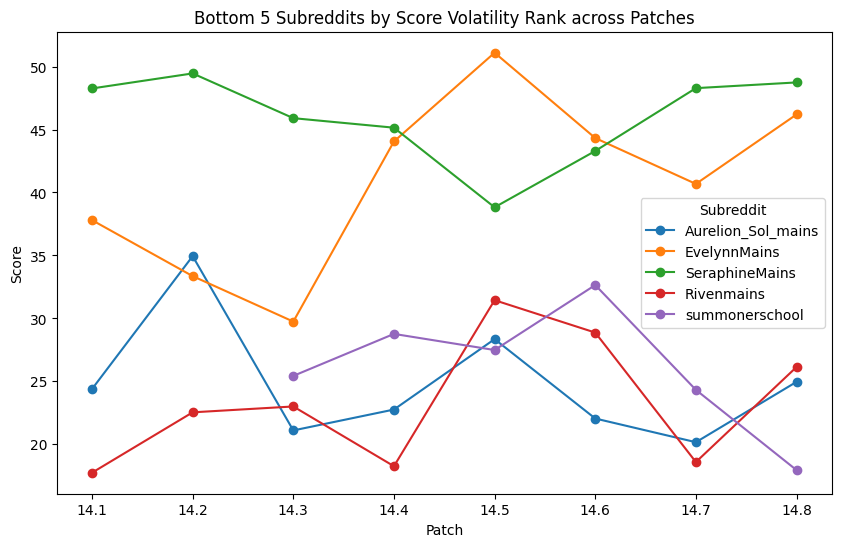

In [74]:
subreddit_patch_values_df = reddit_posts.groupby(['Subreddit', 'Patch']).agg(
    Score=('Score', 'mean'),
    Number_of_Posts=('ID', 'size')
).reset_index()
subreddit_patch_values_df['Avg_Score'] = subreddit_patch_values_df['Score']

subreddit_patch_values_df['diffs'] = subreddit_patch_values_df['Avg_Score'].diff()
mask = subreddit_patch_values_df.Subreddit != subreddit_patch_values_df.Subreddit.shift(1)
subreddit_patch_values_df.loc[mask, 'diffs'] = np.nan
subreddit_patch_values_df['diffs'] = subreddit_patch_values_df['diffs'].fillna(0)
subreddit_patch_values_df['diffs_squared'] = subreddit_patch_values_df['diffs'] ** 2

# Normalize
columns_to_normalize = ['diffs_squared']
subreddit_patch_values_df[columns_to_normalize] = subreddit_patch_values_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

volatility_df = subreddit_patch_values_df.groupby(['Subreddit']).agg(
    diffs_squared=('diffs_squared', 'mean'),
    Number_of_Posts=('Number_of_Posts', 'sum')
).reset_index()
volatility_df['volatility_rank'] = volatility_df['diffs_squared'] * volatility_df['Number_of_Posts']
volatility_df.sort_values(by='volatility_rank', ascending=False, inplace=True)
volatility_df.reset_index(drop=True, inplace=True)
volatility_df = volatility_df.iloc[-5:]
volatility_df.reset_index(drop=True, inplace=True)

plot_df = subreddit_patch_values_df[subreddit_patch_values_df['Subreddit'].isin(volatility_df['Subreddit'])]
plot_df = plot_df.merge(volatility_df[['Subreddit', 'volatility_rank']], on='Subreddit', how='left')
plot_df.sort_values(by=['volatility_rank', 'Patch'], ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))

for subreddit in plot_df['Subreddit'].unique():
    subset = plot_df[plot_df['Subreddit'] == subreddit]
    plt.plot(subset['Patch'], subset['Avg_Score'], marker='o', label=subreddit)

plt.title('Bottom 5 Subreddits by Score Volatility Rank across Patches')
plt.xlabel('Patch')
plt.ylabel('Score')
# plt.yticks([])
plt.legend(title='Subreddit')
plt.grid(False)
plt.show()

### Post Titles+Content - Sentiment Volatility Analysis per Subreddit

##### Top 5 by 'Sentiment Volatility Rank'

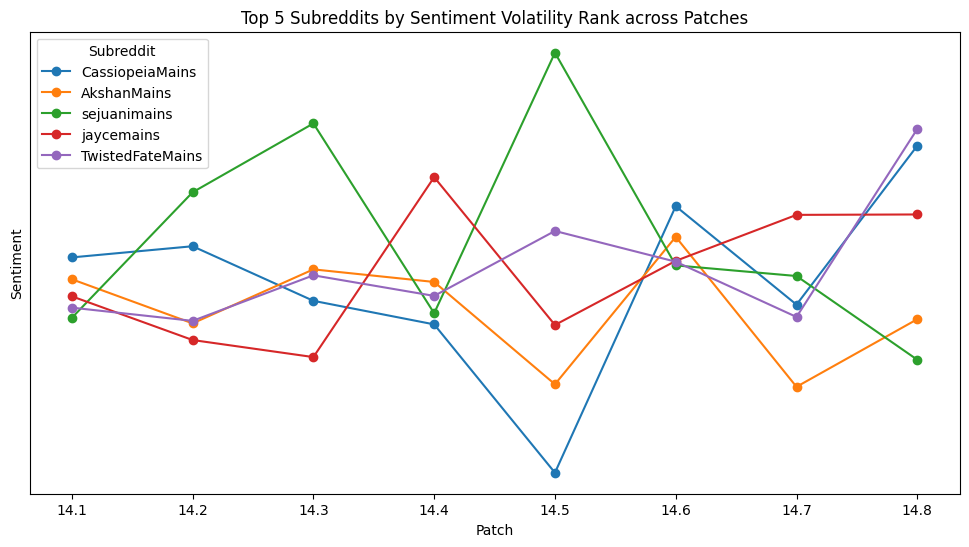

In [76]:
subreddit_patch_values_df = reddit_posts.groupby(['Subreddit', 'Patch']).agg(
    Score=('Score', 'mean'),
    BERT_BASE_Title_Sentiment=('BERT-BASE Title Sentiment', 'mean'),
    RoBERTa_Title_Sentiment=('RoBERTa Title Sentiment', 'mean'),
    BERT_BASE_Content_Sentiment=('BERT-BASE Content Sentiment', 'mean'),
    RoBERTa_Content_Sentiment=('RoBERTa Content Sentiment', 'mean'),
    Number_of_Posts=('ID', 'size')
).reset_index()
subreddit_patch_values_df['Avg_Sentiment'] = (subreddit_patch_values_df['BERT_BASE_Title_Sentiment'] + subreddit_patch_values_df['RoBERTa_Title_Sentiment'] + subreddit_patch_values_df['BERT_BASE_Content_Sentiment'] + subreddit_patch_values_df['RoBERTa_Content_Sentiment']) / 4

subreddit_patch_values_df['diffs'] = subreddit_patch_values_df['Avg_Sentiment'].diff()
mask = subreddit_patch_values_df.Subreddit != subreddit_patch_values_df.Subreddit.shift(1)
subreddit_patch_values_df.loc[mask, 'diffs'] = np.nan
subreddit_patch_values_df['diffs'] = subreddit_patch_values_df['diffs'].fillna(0)
subreddit_patch_values_df['diffs_squared'] = subreddit_patch_values_df['diffs'] ** 2

# Normalize
columns_to_normalize = ['diffs_squared']
subreddit_patch_values_df[columns_to_normalize] = subreddit_patch_values_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

volatility_df = subreddit_patch_values_df.groupby(['Subreddit']).agg(
    diffs_squared=('diffs_squared', 'mean'),
    Number_of_Posts=('Number_of_Posts', 'sum')
).reset_index()
volatility_df['volatility_rank'] = volatility_df['diffs_squared'] * volatility_df['Number_of_Posts']
volatility_df.sort_values(by='volatility_rank', ascending=False, inplace=True)
volatility_df.reset_index(drop=True, inplace=True)
volatility_df = volatility_df.iloc[:5]
volatility_df.reset_index(drop=True, inplace=True)

plot_df = subreddit_patch_values_df[subreddit_patch_values_df['Subreddit'].isin(volatility_df['Subreddit'])]
plot_df = plot_df.merge(volatility_df[['Subreddit', 'volatility_rank']], on='Subreddit', how='left')
plot_df.sort_values(by=['volatility_rank', 'Patch'], ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

for subreddit in plot_df['Subreddit'].unique():
    subset = plot_df[plot_df['Subreddit'] == subreddit]
    plt.plot(subset['Patch'], subset['Avg_Sentiment'], marker='o', label=subreddit)

plt.title('Top 5 Subreddits by Sentiment Volatility Rank across Patches')
plt.xlabel('Patch')
plt.ylabel('Sentiment')
plt.yticks([])
plt.legend(title='Subreddit')
plt.grid(False)
plt.show()

##### Bottom 5 by 'Sentiment Volatility Rank'

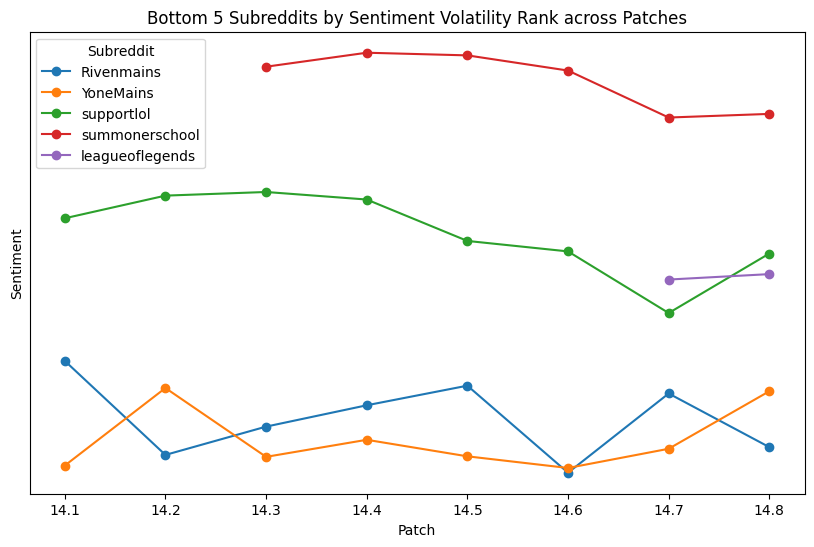

In [34]:
subreddit_patch_values_df = reddit_posts.groupby(['Subreddit', 'Patch']).agg(
    Score=('Score', 'mean'),
    BERT_BASE_Title_Sentiment=('BERT-BASE Title Sentiment', 'mean'),
    RoBERTa_Title_Sentiment=('RoBERTa Title Sentiment', 'mean'),
    BERT_BASE_Content_Sentiment=('BERT-BASE Content Sentiment', 'mean'),
    RoBERTa_Content_Sentiment=('RoBERTa Content Sentiment', 'mean'),
    Number_of_Posts=('ID', 'size')
).reset_index()
subreddit_patch_values_df['Avg_Sentiment'] = (subreddit_patch_values_df['BERT_BASE_Title_Sentiment'] + subreddit_patch_values_df['RoBERTa_Title_Sentiment'] + subreddit_patch_values_df['BERT_BASE_Content_Sentiment'] + subreddit_patch_values_df['RoBERTa_Content_Sentiment']) / 4

subreddit_patch_values_df['diffs'] = subreddit_patch_values_df['Avg_Sentiment'].diff()
mask = subreddit_patch_values_df.Subreddit != subreddit_patch_values_df.Subreddit.shift(1)
subreddit_patch_values_df.loc[mask, 'diffs'] = np.nan
subreddit_patch_values_df['diffs'] = subreddit_patch_values_df['diffs'].fillna(0)
subreddit_patch_values_df['diffs_squared'] = subreddit_patch_values_df['diffs'] ** 2

# Normalize
columns_to_normalize = ['diffs_squared']
subreddit_patch_values_df[columns_to_normalize] = subreddit_patch_values_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

volatility_df = subreddit_patch_values_df.groupby(['Subreddit']).agg(
    diffs_squared=('diffs_squared', 'mean'),
    Number_of_Posts=('Number_of_Posts', 'sum')
).reset_index()
volatility_df['volatility_rank'] = volatility_df['diffs_squared'] * volatility_df['Number_of_Posts']
volatility_df.sort_values(by='volatility_rank', ascending=False, inplace=True)
volatility_df.reset_index(drop=True, inplace=True)
volatility_df = volatility_df.iloc[-5:]
volatility_df.reset_index(drop=True, inplace=True)

plot_df = subreddit_patch_values_df[subreddit_patch_values_df['Subreddit'].isin(volatility_df['Subreddit'])]
plot_df = plot_df.merge(volatility_df[['Subreddit', 'volatility_rank']], on='Subreddit', how='left')
plot_df.sort_values(by=['volatility_rank', 'Patch'], ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))

for subreddit in plot_df['Subreddit'].unique():
    subset = plot_df[plot_df['Subreddit'] == subreddit]
    plt.plot(subset['Patch'], subset['Avg_Sentiment'], marker='o', label=subreddit)

plt.title('Bottom 5 Subreddits by Sentiment Volatility Rank across Patches')
plt.xlabel('Patch')
plt.ylabel('Sentiment')
plt.yticks([])
plt.legend(title='Subreddit')
plt.grid(False)
plt.show()